## Linear Regression using Gradient Descent

- Best fit line represented by y = m1 * x1 + m2 * x2 + m3 * x3 + ... + c
- Fit of line calculated by mean squared error
- parameters computed using gradient descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import make_regression
from implementation.LinearRegression import LinearRegression
plt.style.use('ggplot')

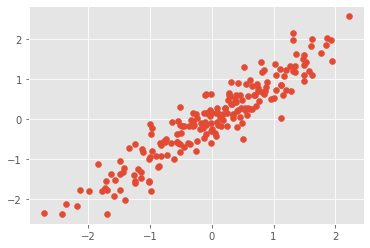

In [2]:
x, y = make_regression(n_features = 1, n_samples = 200, bias = 20, noise = 35)
x = preprocessing.scale(x)
y = preprocessing.scale(y)
plt.scatter(x, y)

In [3]:
model = LinearRegression()
model.fit(x, y, print_every_nth_epoch = 100, epochs = 500, learning_rate = 0.01)

--------- epoch 100 -------> loss=0.12078391448110196 ----------
--------- epoch 200 -------> loss=0.06878172521152762 ----------
--------- epoch 300 -------> loss=0.061814488801287856 ----------
--------- epoch 400 -------> loss=0.060881020732385334 ----------
--------- epoch 500 -------> loss=0.060755954984023496 ----------


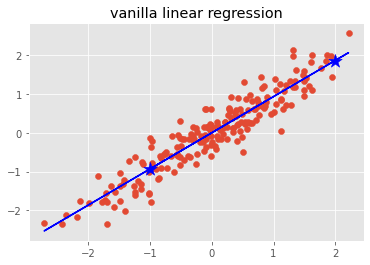

In [4]:
test_x = np.array([[-1], [1.99]])
test_y = model.predict(test_x)

plt.scatter(x, y)
plt.plot(x, model.predict(x), c = 'b')
plt.scatter(test_x, test_y, c = 'b', marker = '*', s = 200)
plt.title("vanilla linear regression")
plt.show()

### Testing multiple regression using polynomial data

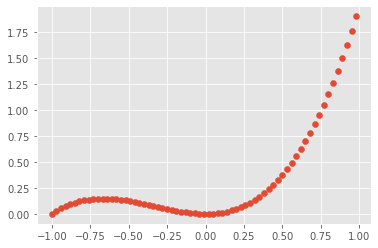

In [5]:
x1 = pd.DataFrame(np.arange(-1,1,0.03))
y1 = x1 ** 3 + x1 ** 2
plt.scatter(x1, y1)
x1[1] = x1[0] ** 2
x1[2] = x1[0] ** 3
x1 = x1.to_numpy()
y1 = y1.to_numpy().T[0]

In [6]:
model1 = LinearRegression()
model1.fit(x1, y1, print_every_nth_epoch = 150, epochs = 1500, learning_rate = 0.1)

--------- epoch 150 -------> loss=0.006975886560201781 ----------
--------- epoch 300 -------> loss=0.002609457581778523 ----------
--------- epoch 450 -------> loss=0.0014298064047629756 ----------
--------- epoch 600 -------> loss=0.0008477509170361644 ----------
--------- epoch 750 -------> loss=0.0005088667247867457 ----------
--------- epoch 900 -------> loss=0.00030600645299420746 ----------
--------- epoch 1050 -------> loss=0.00018406582475794008 ----------
--------- epoch 1200 -------> loss=0.00011072170041058871 ----------
--------- epoch 1350 -------> loss=6.660315853773048e-05 ----------
--------- epoch 1500 -------> loss=4.0064273237193276e-05 ----------


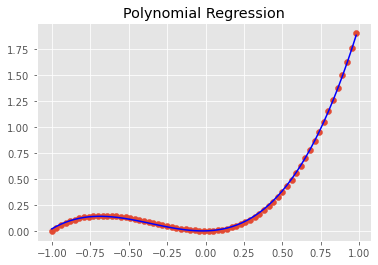

In [7]:
plt.scatter(x1.T[0], y1)
plt.plot(x1.T[0], model1.predict(x1), c = "b")
plt.title("Polynomial Regression")
plt.show()

### Rigde Regression

In [8]:
model2 = LinearRegression(regularization = "L2")
model2.fit(x, y, print_every_nth_epoch = 100, lambda_ = 0.0001)

--------- epoch 100 -------> loss=0.06082651803709771 ----------


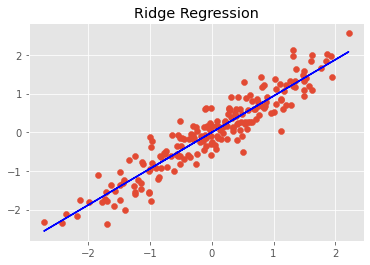

In [9]:
plt.plot(x, model2.predict(x), c = "b")
plt.scatter(x, y)
plt.title("Ridge Regression")
plt.show()

### Lasso Regression

In [10]:
model3 = LinearRegression(regularization = "L1")
model3.fit(x, y, print_every_nth_epoch = 100, lambda_ = 0.00001)

--------- epoch 100 -------> loss=0.060745982741637956 ----------


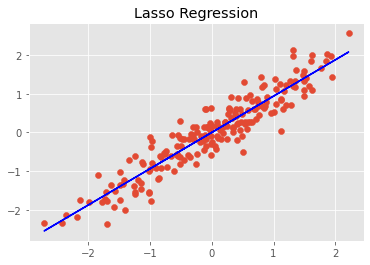

In [11]:
plt.scatter(x, y)
plt.plot(x, model3.predict(x), c = "b")
plt.title("Lasso Regression")
plt.show()